# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#build the url to access information
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

#create lists for needed info
city_name = []
city_id = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind_spd = []
country = []
date = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        city_id.append(response["id"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_spd.append(response["wind"]["speed"])
        date.append(response["dt"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
        
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | vila
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | sobolevo
City not found. Skipping...
Processing Record 5 of Set 1 | cocachacra
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | ixtapa
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | viedma
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | emerald
Processing Record 20 of Set 1 | rikitea
City not found. Skipping...
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | ty

Processing Record 34 of Set 4 | north platte
Processing Record 35 of Set 4 | pocao de pedras
Processing Record 36 of Set 4 | berlevag
Processing Record 37 of Set 4 | shache
Processing Record 38 of Set 4 | kavaratti
Processing Record 39 of Set 4 | casa nova
Processing Record 40 of Set 4 | amuntai
Processing Record 41 of Set 4 | turukhansk
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | kitimat
Processing Record 44 of Set 4 | la ronge
Processing Record 45 of Set 4 | marawi
Processing Record 46 of Set 4 | te anau
Processing Record 47 of Set 4 | poum
Processing Record 48 of Set 4 | richards bay
Processing Record 49 of Set 4 | byron bay
City not found. Skipping...
Processing Record 50 of Set 4 | moses lake
Processing Record 0 of Set 5 | bethel
Processing Record 1 of Set 5 | bulgan
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | vanavara
Processing Record 4 of Set 5 | inhambane
City not found. Skipping...
Processing Record 5 of Set 5 | vostoc

Processing Record 16 of Set 8 | henties bay
Processing Record 17 of Set 8 | san ignacio
City not found. Skipping...
Processing Record 18 of Set 8 | lima
Processing Record 19 of Set 8 | bathsheba
Processing Record 20 of Set 8 | kristinehamn
Processing Record 21 of Set 8 | tshikapa
Processing Record 22 of Set 8 | palamedu
Processing Record 23 of Set 8 | las choapas
Processing Record 24 of Set 8 | pokrovsk
Processing Record 25 of Set 8 | khonsa
Processing Record 26 of Set 8 | huntsville
Processing Record 27 of Set 8 | san quintin
Processing Record 28 of Set 8 | junction city
Processing Record 29 of Set 8 | kanniyakumari
Processing Record 30 of Set 8 | jijiga
Processing Record 31 of Set 8 | novyy urengoy
Processing Record 32 of Set 8 | walvis bay
Processing Record 33 of Set 8 | general cepeda
Processing Record 34 of Set 8 | port hardy
Processing Record 35 of Set 8 | hualmay
Processing Record 36 of Set 8 | sangre grande
Processing Record 37 of Set 8 | tuatapere
Processing Record 38 of Set 8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_weather = pd.DataFrame({    
    "ID" : city_id,
    "City" : city_name,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : temp,
    "Humidity" : humidity,
    "Cloudiness" : clouds,
    "Wind Speed" : wind_spd,
    "Country" : country,
    "Date" : date
})

city_weather

,ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,7117100,Vila,42.0304,-8.1588,19.49,31,19,0.55,PT,1659779583
1,3355672,Lüderitz,-26.6481,15.1594,18.47,53,33,2.63,NA,1659779211
2,3833367,Ushuaia,-54.8000,-68.3000,-1.19,86,0,1.03,AR,1659779586
3,525426,Sobolevo,54.4299,31.8996,26.21,58,1,3.74,RU,1659779587
4,3942957,Cocachacra,-17.0883,-71.7575,14.58,89,97,1.92,PE,1659779590
...,...,...,...,...,...,...,...,...,...,...
532,581049,Arkhangelsk,64.5401,40.5433,29.06,51,40,5.00,RU,1659780280
533,5468773,Gallup,35.5281,-108.7426,17.91,68,0,0.00,US,1659780400
534,2016307,Solnechnyy,50.7214,136.6319,21.22,93,27,2.29,RU,1659780400
535,214575,Kampene,-3.6000,26.6667,34.33,29,61,0.55,CD,1659780401


In [11]:
#use the .describe function
city_weather[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,20.872415,13.119242,21.156182,69.810056,58.415270,3.408771
std,33.989092,89.398869,8.202080,21.653075,37.482344,2.190114
min,-54.800000,-175.200000,-1.190000,9.000000,0.000000,0.000000
25%,-7.000000,-64.616700,14.740000,57.000000,20.000000,1.840000
50%,26.354400,14.505300,22.830000,75.000000,70.000000,2.990000
75%,50.233400,86.931700,27.190000,87.000000,97.000000,4.610000
max,78.218600,179.316700,47.760000,100.000000,100.000000,11.720000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.

#NO CITIES OVER 100% HUMIDITY

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

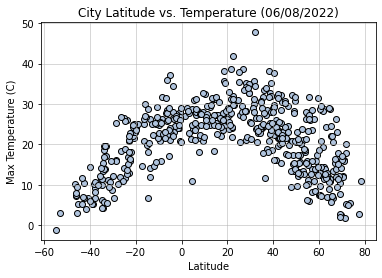

In [20]:
plt.scatter(lat, temp, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Temperature (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

## Latitude vs. Humidity Plot

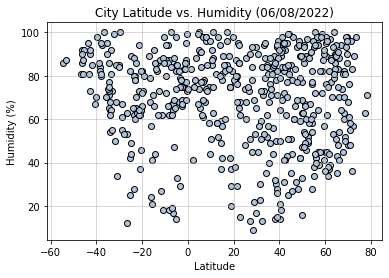

In [22]:
plt.scatter(lat, humidity, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

## Latitude vs. Cloudiness Plot

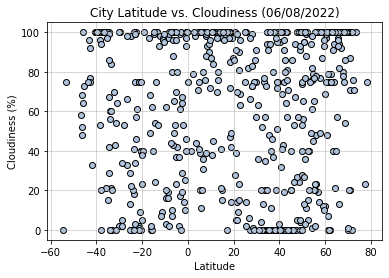

In [23]:
plt.scatter(lat, clouds, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

## Latitude vs. Wind Speed Plot

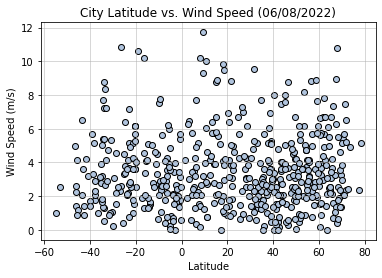

In [24]:
plt.scatter(lat, wind_spd, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

## Linear Regression

In [25]:
nth_hem = city_weather.loc[city_weather["Lat"] >=0]
sth_hem = city_weather.loc[city_weather["Lat"] <0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7640805857357578


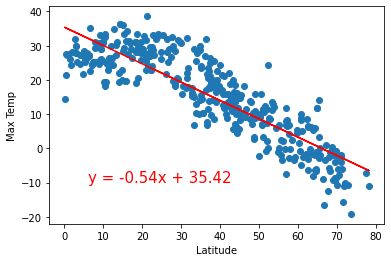

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6256245981061876


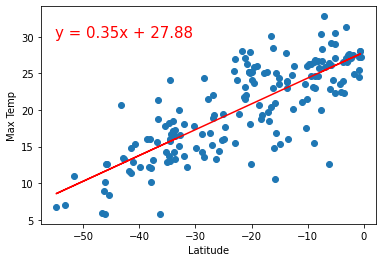

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06982695849910577


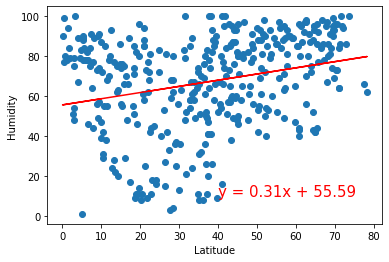

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02022495487637025


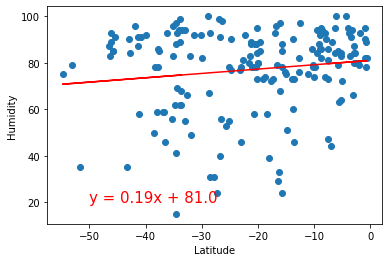

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.019699884022974727


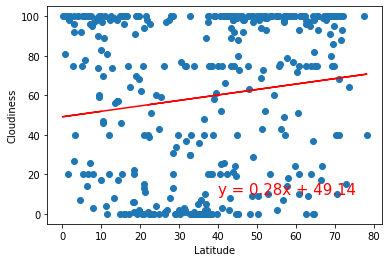

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.080260704316503


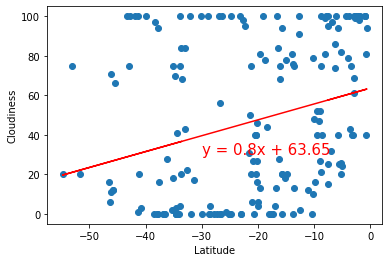

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0020341076093606733


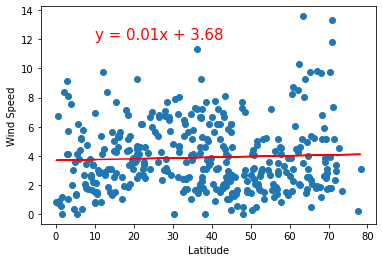

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07155750601569683


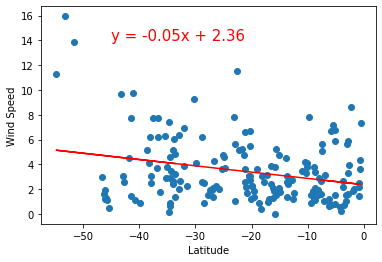